### Import Tensorflow library

It is recommended that you use a minimum version of 1.10.0

In [47]:
import tensorflow as tf

tf.__version__

'1.11.0'

### A collection of 28x28 pixel sized images of handwritten digits 0 through 9


In [48]:
mnist = tf.keras.datasets.mnist

### Unpack the dataset

In [49]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [50]:
import matplotlib.pyplot as plt

### Let's see what the tensor (the multi-dimensional array) looks like by simply printing

In [51]:
print('\n', x_train[0], '\n')


 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

### But that tensor is difficult to visually understand. So let's create this plot to visualise it

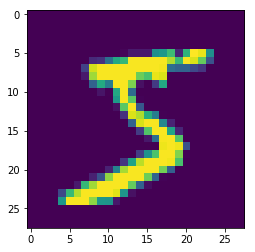

In [52]:
plt.imshow(x_train[0])
plt.show()

### Now as you can see, the plot is coloured. We can make it binary coloured (b&w) too.

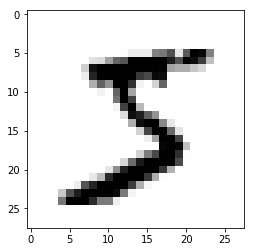

In [53]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

### Now once we have this data, we need to normalise this. And by normalising, what we are essentially doing here is actually scaling the data.

In [54]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

### Now that the data has been normalised, let us visualise it again

In [55]:
print('\n', x_train[0], '\n')


 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.  

### Let's plot and visualise the binary-coloured image now

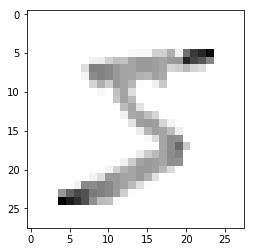

In [56]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

### As you can see in the plot here, the colours have been greyed out. This effectively means that:
Earlier: the colour range was from 0 to 255  
Now: the colour range is from 0 to 1  
This will make it much easier for us to work with and understand.

### Now let's start to build the model

In [57]:
model = tf.keras.models.Sequential()
# There are 2 kinds of models
# The sequential is the most commonly-used model. It is a feed-forward model.
# The Functional model has an API that allows for more flexible model designing.

### Now let's create the layers using Model.add()

In [58]:
# Input layer
model.add(tf.keras.layers.Flatten())
# This will flatten the 28x28 grid in one axis such that it now becomes a one-dimensional array.

# Hidden Layer 1
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu ))
# This will have 128 neurons/nodes and the activation function will be ReLu

# Hidden Layer 2
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu ))
# This will again have 128 neurons/nodes and the activation function will be ReLu

# Output Layer
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax ))
# This will have 10 neurons/nodes (because of the 10 classes, 0 through to 9)
# and the activation function will be SoftMax (since it is a probability distribution)

#### This was the definition of the architecture of our model

### Now let's define some parameters for the training of the model

In [59]:
model.compile(optimizer= 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# We use adam because its the most common go-to optimiser
# But we can also use something like stochastic gradient descent

# We always measure loss, because
# A NN never really tries to maximise accuracy
# It always tries to minimise the Loss

### Now let's start to train the model

In [60]:
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 4s 66us/step - loss: 0.2635 - acc: 0.9234
Epoch 2/3
60000/60000 [==============================] - 4s 63us/step - loss: 0.1079 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 4s 61us/step - loss: 0.0732 - acc: 0.9768


### Now 97.68 % accuracy could be exciting, but its important to remember that NN's are great at fitting
And the vital question now is that, did it overfit?  
Because, the idea/hope is that the model should generalise and not fit explicitly to the training data

### So what we are going to do is calculate the validation loss and the validation accuracy

In [61]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print('\nValidation Loss: ', val_loss, '\n')
print('Validation Accuracy: ', val_acc)

10000/10000 [==============================] - 0s 34us/step

Validation Loss:  0.09050771306175738 

Validation Accuracy:  0.9734


### So we see that the loss is higher that the last training loss
And the accuracy is slightly lower than the last training accuracy  
But that is actually good - shows no overfitting!

### Let's now make some predictions using this model which has been trained

In [62]:
predictions = model.predict([x_test])

# But if we directly print the predictions' value, the output will be a one-hot encoded output and will not be easily understandable
# The numbers are essentially probability distributions
print (predictions)

[[5.3726645e-10 4.4997659e-08 1.4207778e-05 ... 9.9997830e-01
  2.1092553e-08 1.2886889e-07]
 [3.9090023e-06 1.0206548e-05 9.9993718e-01 ... 1.3638708e-09
  7.9825395e-07 2.2702399e-11]
 [8.7195184e-09 9.9968266e-01 1.0729667e-05 ... 1.0578961e-04
  1.5988521e-04 7.2565321e-08]
 ...
 [1.1421005e-09 9.4361872e-07 2.0266999e-09 ... 3.6290967e-05
  6.4803271e-07 4.0327104e-06]
 [1.3797465e-06 4.5851738e-07 1.5516280e-08 ... 8.4671228e-08
  7.6730811e-04 3.1416768e-08]
 [3.7742086e-06 2.3368331e-08 6.8192026e-06 ... 9.0470145e-11
  7.5679725e-07 2.7356366e-09]]


### But what can we do with this output?
We can use TensorFlow's inbuilt libraries but then we have to make sessions . and so on.  
Instead we can simply use Numpy  

### Import Numpy library

In [63]:
import numpy as np

print(np.argmax(predictions[0]))

7


### So how do we actually verify it?
So the output at the 1st position is 7 - probably (since it has been predicted by this trained model)
We can totally visualise it using numpy and this verifies that the predicted output is correct

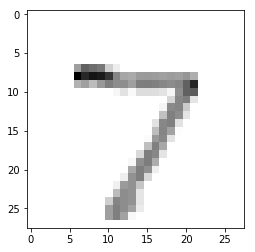

In [64]:
plt.imshow(x_test[0], cmap = plt.cm.binary)

### Let's check for another output

2


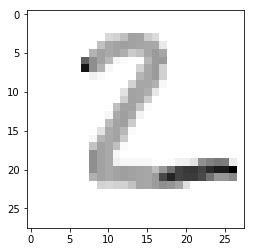

In [65]:
print(np.argmax(predictions[1]))
plt.imshow(x_test[1], cmap = plt.cm.binary)

### As we can see the output has been correctly predicted.
#### The model is working prefectly fine.